In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


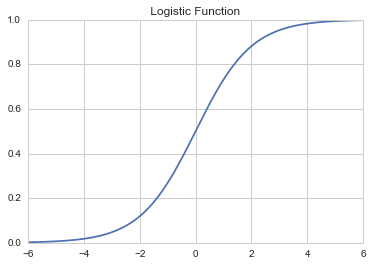

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [6]:
def affair_check(x):
    if x!=0:
        return 1
    else:
        return 0


In [7]:
df['Had_affair'] = df['affairs'].apply(affair_check)

In [8]:
df_tail

NameError: name 'df_tail' is not defined

In [11]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [12]:
df.groupby('Had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


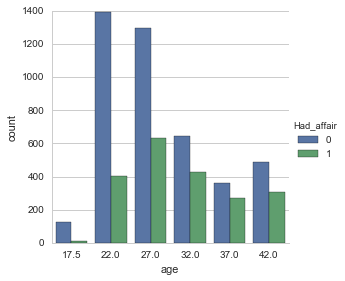

In [14]:
sns.factorplot('age',data=df,hue='Had_affair',kind='count')

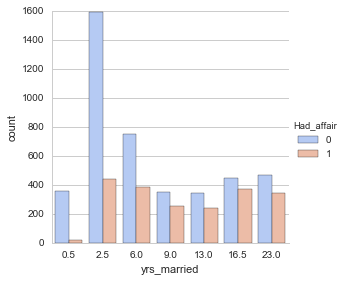

In [15]:
sns.factorplot('yrs_married',data=df,hue='Had_affair',kind='count',palette='coolwarm')

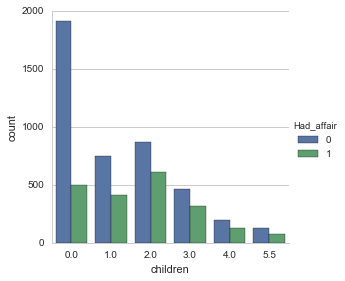

In [16]:
sns.factorplot('children',data=df,hue='Had_affair',kind='count')

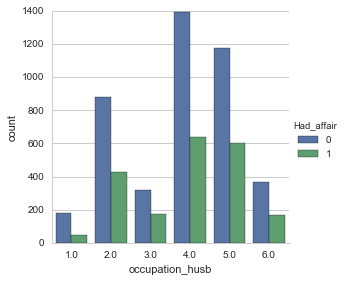

In [19]:
sns.factorplot('occupation_husb',data=df,hue='Had_affair',kind='count')

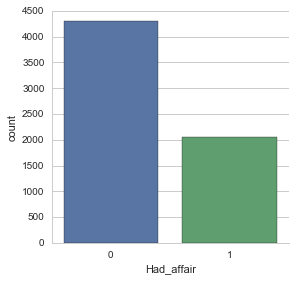

In [20]:
sns.factorplot('Had_affair',data=df,kind='count')

In [22]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [23]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [24]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [25]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [41]:
X = df.drop(['occupation','occupation_husb','Had_affair'],axis=1)

In [29]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [31]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3,32,9.0,3,3,17,0.111111
1,3,27,13.0,3,1,14,3.230769
2,4,22,2.5,0,1,16,1.400000
3,4,37,16.5,4,3,16,0.727273
4,5,27,9.0,1,1,14,4.666666


In [42]:
X = pd.concat([X,dummies],axis=1)

In [36]:
Y = df.Had_affair

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [44]:
X.drop(['affairs','occ1','hocc1'],axis=1,inplace=True)

In [45]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [46]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affair, dtype: int64

In [47]:
Y = np.ravel(Y)

In [48]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
log_model = LogisticRegression()

In [50]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
log_model.score(X,Y)

0.72588752748978946

In [53]:
Y.mean()

0.32249450204209867

In [56]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [57]:
coeff_df

,0,1
0,rate_marriage,[-0.697845453825]
1,age,[-0.0563368031972]
2,yrs_married,[0.103893444136]
3,children,[0.0181853982481]
4,religious,[-0.368506616998]
5,educ,[0.00864804494766]
6,occ2,[0.298118794658]
7,occ3,[0.608150180777]
8,occ4,[0.346511273036]
9,occ5,[0.942259498161]


In [58]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [60]:
log_model2 = LogisticRegression()

In [61]:
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
class_predict = log_model2.predict(X_test)

In [63]:
print metrics.accuracy_score(Y_test, class_predict)

0.73932160804
